## Fundamental

It is a **classification** method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors)

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/SVM1.png)

Now, we will **find some line that splits the data** between the two differently classified groups of data. This will be the line such that the **distances from the closest point** in **each of the two groups will be farthest away.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/SVM2.png)

In the example shown above, the line which splits the data into two differently classified groups is the black line, since the two closest points are the farthest apart from the line. This line is our classifier. Then, depending on where the testing data lands on either side of the line, that’s what class we can classify the new data as.

More: [Simplified Version of Support Vector Machine](https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/)

Think of this algorithm as playing JezzBall in n-dimensional space. The tweaks in the game are:

    You can draw lines / planes at any angles (rather than just horizontal or vertical as in classic game)
    The objective of the game is to segregate balls of different colors in different rooms.
    And the balls are not moving.

## Simple example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# data
X = np.array([[1,2], [4,7], [1.5,1.8], [5,6], [1,0.6], [5.5,8], [2,3], [4,6]])
# label
y = np.array([0,1,0,1,0,1,0,1])

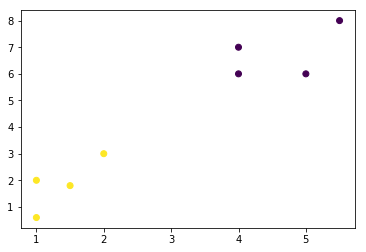

In [3]:
# data visualization
plt.scatter(X[:, 0], X[:, 1], c = 1-y)
plt.show()

In [4]:
# model
from sklearn import svm
# train model 
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# predition
print('Predicted label:\t', clf.predict(X))
print('True label:\t\t', y)

Predicted label:	 [0 1 0 1 0 1 0 1]
True label:		 [0 1 0 1 0 1 0 1]


In [6]:
# model information/parameter:
# get support vectors
print('Support vectors:', clf.support_vectors_)
# get indices of support vectors
print('Indices of support vectors in data:', clf.support_)
# get number of support vectors for each class
print('Number of support vectors per class:', clf.n_support_)

Support vectors: [[2. 3.]
 [4. 6.]]
Indices of support vectors in data: [6 7]
Number of support vectors per class: [1 1]


In [7]:
(clf.decision_function(X)>0).astype(int)

array([0, 1, 0, 1, 0, 1, 0, 1])

In [8]:
clf.coef_.dot(X.T)+clf.intercept_-clf.decision_function(X)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -8.8817842e-16,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00]])

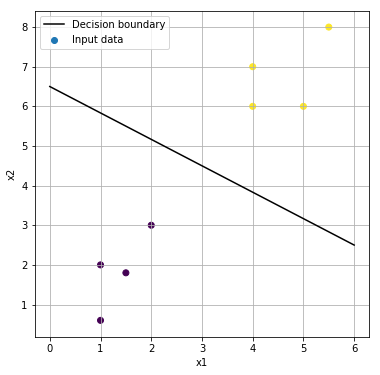

In [9]:
# data with decision boundary: clf.coef_ * X + clf.intercept_ = 0
# take model coefficients
w = clf.coef_[0]
b = clf.intercept_[0]
# the slope of decision boundary
k = -w[0] / w[1]
# values of X[0]
x0 = np.linspace(0,6)
# values of X[1]
# w[0]x0 + w[1]x1 + b = 0 => x1 = -w[0]/w[1] * x0 - b/w[1] = -k*x0 - b/w[1]
x1 = k * x0 - b / w[1]

# plotting
plt.figure(figsize=(6,6))
plt.plot(x0, x1, 'k-', label="Decision boundary")
plt.scatter(X[:, 0], X[:, 1], c=(y+1), label='Input data')
plt.legend(), plt.grid(True), plt.xlabel('x1'), plt.ylabel('x2')
plt.show()

## SVM with scikit learn and iris data set

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
# Initialise and train model
C = 1.0
svm_model = svm.SVC(kernel='linear', C=C)
svm_model.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Accuracy Score: 99.3%')

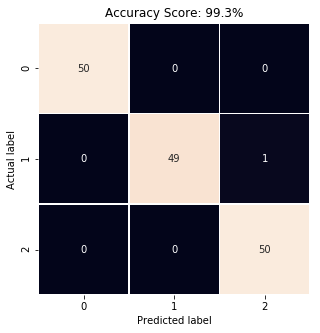

In [12]:
# calculate confusion matrices
from sklearn.metrics import confusion_matrix

prediction = svm_model.predict(iris.data)
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = svm_model.score(X=iris.data, y=iris.target)

# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.2g', linewidths=.5, square = True, cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12)

## Additional material

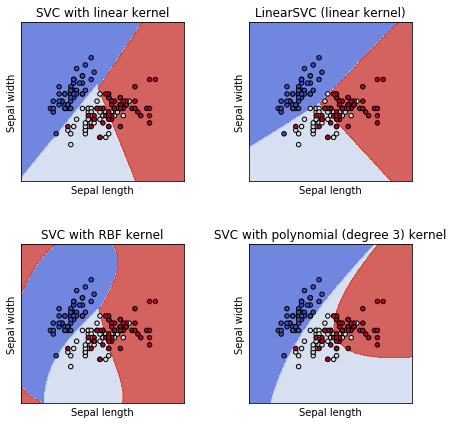

In [13]:
# Plot different SVM classifiers in the iris dataset
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(7,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()